<h1>Librerías</h1>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h2> Carga de data </h2>

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.shape

(891, 12)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<h2><b>Análisis exploratorio</b></h2>

<h3>Eliminación de variables</h3>
<ul>
  <li>Se elimina PassengerId porque es una variable de tipo ID</li>
  <li>Se elimina Name ya que no se requiere para el modelo </li>
</ul>

In [ ]:
df.drop(columns = ['PassengerId','Name'],inplace = True)

<h3><b>Distribución de variable objetivo</b></h3>
<p>Para verificar si las clases están desbalanceadas</p>

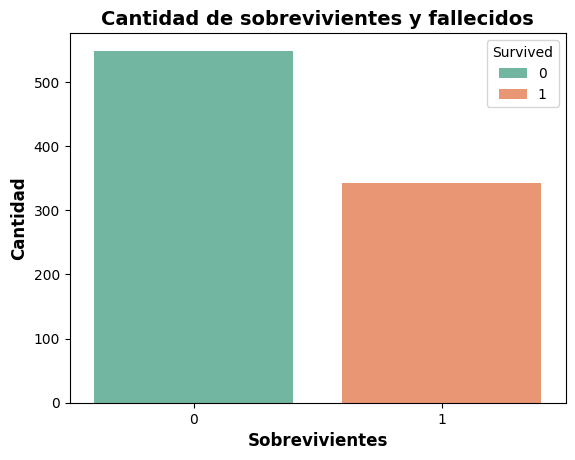

In [ ]:
sns.countplot(df,x='Survived',hue = 'Survived',palette= 'Set2')
plt.title('Cantidad de sobrevivientes y fallecidos',fontsize=14,fontweight='bold')
plt.ylabel('Cantidad',fontsize=12,fontweight='bold')
plt.xlabel('Sobrevivientes',fontsize=12,fontweight='bold')
plt.show()

<h2><b>Análisis univariado</b></h2>

<h2><b>Variables numéricas</b></h2>

In [ ]:
data = df.drop(columns='Survived')
lista_numerica = [col for col in data.select_dtypes('number').columns]
lista_numerica

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

<h2><b>Distribución de la edad de pasajeros</b></h2>
<p>Corresponde a una <b>variable de tipo discreta</b>, ya que solo puede tomar valores enteros</p>
<br>
<ul>
<li>El <b>histograma</b> se realiza para saber la <b>distribución</b> de los datos y determinar la mejor forma de <b>imputar</b> los valores <b>nulos</b>, en este caso se ve que <b>la distribución tiene un sesgo a la derecha</b>, por lo que <b>es más representativa la mediana</b> que el promedio.</li>
<br>
<li>En cuanto al <b>boxplot</b>, se realiza para determinar si existen valores <b>outliers</b>, los cuales se ubican fuera de los bigotes como se ve en el gráfico, pero con esta variable en particular esos valores no corresponden a outliers, ya que es posible encontrar personas mayores a 60 años.</li>

</ul>

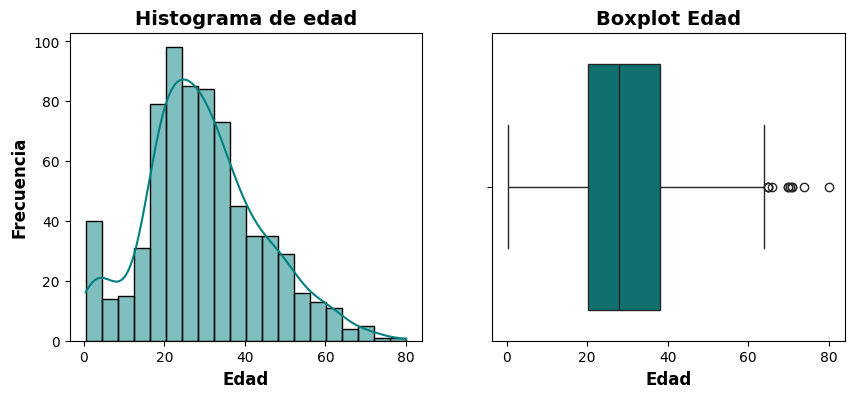

In [ ]:
fig,ax = plt.subplots(1,2,figsize = (10,4))
sns.histplot(df,x='Age',kde = True,color = 'teal',ax=ax[0])
ax[0].set_title('Histograma de edad',fontsize = 14,fontweight = 'bold')
ax[0].set_xlabel('Edad',fontsize = 12,fontweight = 'bold')
ax[0].set_ylabel('Frecuencia',fontsize = 12,fontweight = 'bold')
sns.boxplot(df,x='Age',color = 'teal',ax=ax[1])
ax[1].set_title('Boxplot Edad',fontsize = 14,fontweight = 'bold')
ax[1].set_xlabel('Edad',fontsize = 12,fontweight = 'bold')
plt.show()

<h2><b>Gráficos para pclass</b></h2>
<p>Corresponde a una variable discreta ya que solo toma cierta cantidad de números enteros</p>


In [ ]:
df.Pclass.value_counts()

,count
Pclass,
3,491
1,216
2,184


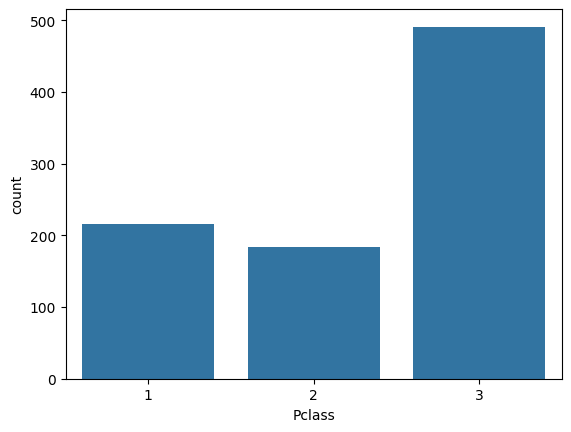

In [ ]:
sns.countplot(df,x='Pclass')
plt.show()

<h2>